In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import keras
import tensorflow
import os
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint 
from keras.datasets import mnist 
import warnings
warnings.filterwarnings("ignore")

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape #(1,2,3)=(1,6)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

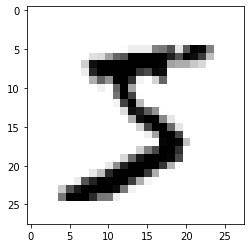

In [3]:
plt.imshow(X_train [0] , cmap= 'binary')

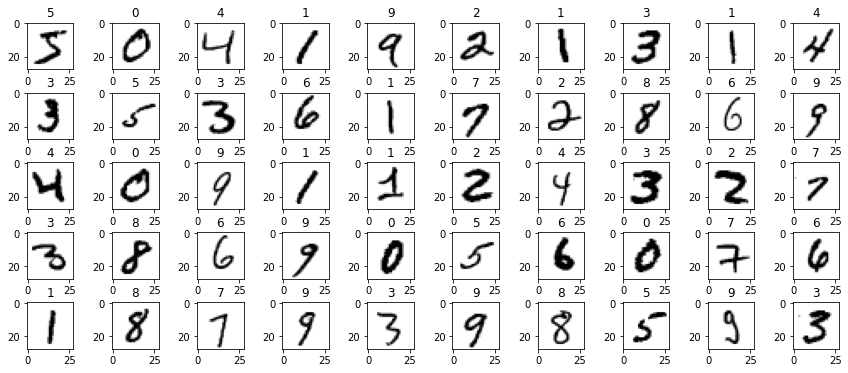

In [4]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        #plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [35]:
X_train = X_train.astype (np.float32)/255 
X_test = X_test.astype(np. float32)/255

#**SVM**

In [36]:
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))

In [37]:
nsampless, nnx, nny = X_test.shape
d1_train_dataset = X_test.reshape((nsampless,nnx*nny))

In [8]:
model_linear = SVC(kernel='linear')
model_linear.fit(d2_train_dataset, y_train)

SVC(kernel='linear')

In [9]:
y_pred = model_linear.predict(d1_train_dataset)

In [53]:
svm_pred=metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
SVM_acc=round(svm_pred*100,2)
print("SVM Accuracy:",SVM_acc)

SVM Accuracy: 94.04


# **KNN**

In [11]:
import operator 
from operator import itemgetter

In [12]:
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [13]:
class KNN:
    def __init__(self, K):
        self.K = K

In [14]:
class KNN:
    def __init__(self, K):
        self.K = K
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train

In [15]:
class KNN:
    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in  self.X_train])
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions

In [16]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [17]:
kVals = np.arange(3,20,2)
accuracies = []
for k in kVals:
  model = KNeighborsClassifier(k)
  model.fit(d2_train_dataset, y_train)
  predk = model.predict(d1_train_dataset)
  acc = accuracy_score(y_test, predk)
  accuracies.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9705
K = 5; Accuracy: 0.9688
K = 7; Accuracy: 0.9694
K = 9; Accuracy: 0.9659
K = 11; Accuracy: 0.9668
K = 13; Accuracy: 0.9653
K = 15; Accuracy: 0.9633
K = 17; Accuracy: 0.963
K = 19; Accuracy: 0.9632


In [52]:
max_accuracy = max(accuracies)
KNN_acc=round(max_accuracy*100,2)
print("KNN Accuracy:",KNN_acc)

KNN Accuracy: 97.05


#**CNN**

In [56]:
X_train = np.expand_dims (X_train, -1)
X_test = np.expand_dims (X_test, -1)

In [57]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [22]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation='relu') )
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [23]:
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [24]:
es = EarlyStopping (monitor='val_accuracy', mode="max", patience= 5, verbose= 1,restore_best_weights=True)
his = model.fit(X_train, y_train, epochs= 50, validation_split= 0.2,callbacks=[es] )

Epoch 1/50
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2012 - accuracy: 0.9383 - val_loss: 0.0820 - val_accuracy: 0.9767
Epoch 2/50
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.0503 - val_accuracy: 0.9852
Epoch 3/50
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0529 - accuracy: 0.9842 - val_loss: 0.0496 - val_accuracy: 0.9853
Epoch 4/50
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0451 - val_accuracy: 0.9864
Epoch 5/50
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0451 - val_accuracy: 0.9857
Epoch 6/50
1500/1500 [==============================] - 49s 32ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0382 - val_accuracy: 0.9893
Epoch 7/50
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0344 -

In [25]:
model_name = 'digits_reco.model'
model.save(model_name, save_format='model')
model_save_name = 'bestmodels.model'
mc=ModelCheckpoint(F"/content/drive/My Drive/{model_save_name}", monitor='val_acc', verbose=1, save_weights_only=False, save_best_only=False, mode='max')
cb=[es,mc]
cb 

INFO:tensorflow:Assets written to: digits_reco.model/assets


In [26]:
model_S = keras.models.load_model("/content/digits_reco.model") 

In [59]:
score = model_S.evaluate (X_test, y_test)
CNN=score[1]*100
CNN_acc=round(CNN,2)
print("CNN model accuracy is",CNN_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0290 - accuracy: 0.9910
CNN model accuracy is 99.1


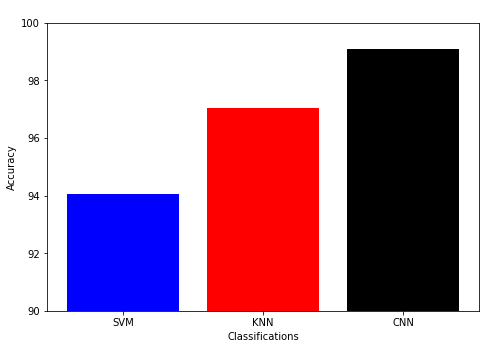

In [66]:
Class = ['SVM','KNN','CNN']
values=[SVM_acc,KNN_acc,CNN_acc] 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Class, values, color=("Blue","Red","Black"))
plt.ylim(90, 100)
plt.xlabel("Classifications")
plt.ylabel("Accuracy")
plt.title(" ")
plt.show()

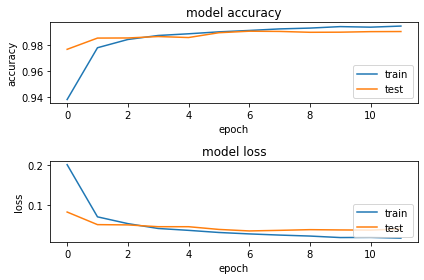

In [28]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.tight_layout()
